In [1]:
file_path = "./MLHomework_Toxicity/train_origin.csv"
import pandas as pd
file = pd.read_csv(file_path)
df = pd.DataFrame(file)

In [3]:
df

,id,comment_text,target
0,5413656,???...You trying to hard...#MAGA,0.000000
1,267023,I am not speaking for myself. I pay for my own...,0.166667
2,5092377,"bank of hawaii, first hawaiian bank, most land...",0.000000
3,723958,"""Trump on Friday night vowed to seek approval ...",0.000000
4,5571767,"Right...so if the headlines instead read ""Clin...",0.000000
...,...,...,...
1777795,6252077,Your flip-flops are in the mail Billy!,0.000000
1777796,5358958,"When I taught C language computer programming,...",0.000000
1777797,5287987,Trudeau justified by lying & saying they were ...,0.200000
1777798,5129035,So i really want you to think about what you a...,0.000000


In [2]:
file_path = "./MLHomework_Toxicity/train_extra.csv"
import pandas as pd
df = pd.DataFrame(pd.read_csv(file_path))

In [152]:
test_index = np.random.choice(range(df.shape[0]), int(df.shape[0] * 0.1), replace=False)

In [158]:
train_index = [i for i in range(df.shape[0]) if i not in test_index]

In [156]:
df_test = df.loc[sorted(test_index)]

In [157]:
df_test

,id,comment_text,target
18,683488,"...And, while with silent lifting mind I've tr...",0.000000
36,5247774,They can't admit to being duped because that w...,0.300000
44,247863,The state ODEQ and the Health Authority cannot...,0.000000
59,384852,When a kid in Portland sees the drug dealers t...,0.000000
71,928120,I continue to be shocked that one person in a ...,0.000000
...,...,...,...
1777756,989779,Good job!,0.000000
1777763,675743,One animal control officer for a city the size...,0.000000
1777768,5126768,Fire Munoz. The pathetic United CEO originally...,0.166667
1777779,5694937,which one is this?\nuday or qusay?,0.000000


In [160]:
df_test.to_csv("test.csv")

In [161]:
df_train.to_csv("train.csv")

In [159]:
df_train = df.loc[sorted(train_index)]
df_train

,id,comment_text,target
0,5413656,???...You trying to hard...#MAGA,0.000000
1,267023,I am not speaking for myself. I pay for my own...,0.166667
2,5092377,"bank of hawaii, first hawaiian bank, most land...",0.000000
3,723958,"""Trump on Friday night vowed to seek approval ...",0.000000
4,5571767,"Right...so if the headlines instead read ""Clin...",0.000000
...,...,...,...
1777795,6252077,Your flip-flops are in the mail Billy!,0.000000
1777796,5358958,"When I taught C language computer programming,...",0.000000
1777797,5287987,Trudeau justified by lying & saying they were ...,0.200000
1777798,5129035,So i really want you to think about what you a...,0.000000


In [2]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/home/user/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1432: UserWarning: local_files_only is manually set to True for PreTrainedTokenizerBase.from_pretrained in ~/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py
  warnings.warn("local_files_only is manually set to True for PreTrainedTokenizerBase.from_pretrained in ~/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py")


In [ ]:
from tqdm import tqdm
lengths = [len(tokenizer.encode(_)) for _ in tqdm(df['comment_text'])]

 10%|▉         | 176357/1777800 [02:43<25:07, 1061.98it/s]

In [ ]:
max(lengths), min(lengths)

In [7]:
# the text length
x = [i+1 for i in range(max(lengths))]
y = [lengths.count(i) for i in x]

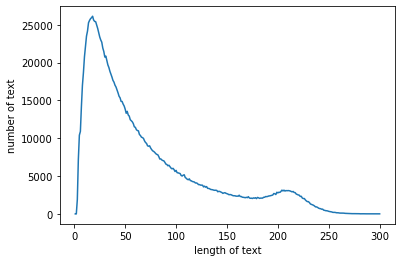

In [11]:
import matplotlib.pyplot as plt
plt.plot(x[:300],y[:300])
plt.xlabel("length of text")
plt.ylabel("number of text")
plt.savefig("trainset-PDF.png")

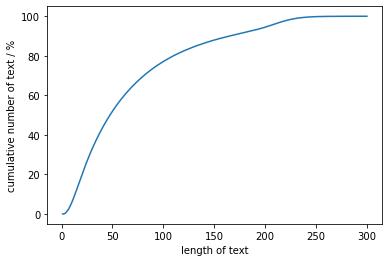

In [9]:
import numpy as np
plt.plot(x[:300],np.cumsum(y)[:300]/sum(y)*100)
plt.xlabel("length of text")
plt.ylabel("cumulative number of text / %")
plt.savefig("trainset-CDF.png")

In [10]:
np.cumsum(y)[200] / sum(y)

0.9461306108673642